# Name: Rawan Saqer AlHarbi
# ID: 421010012

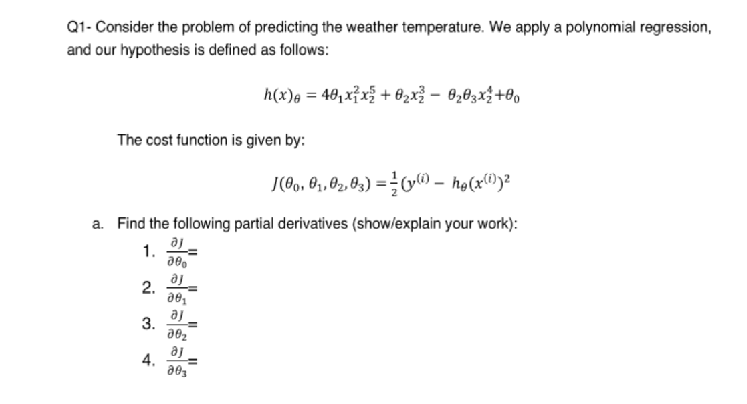

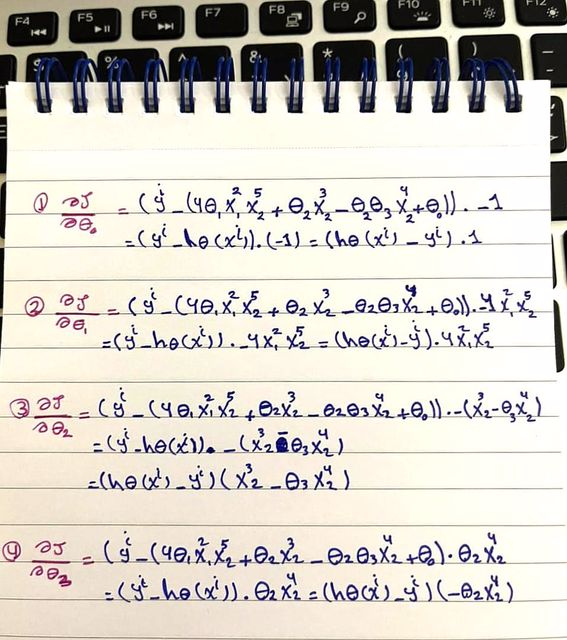

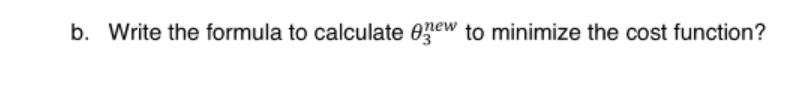

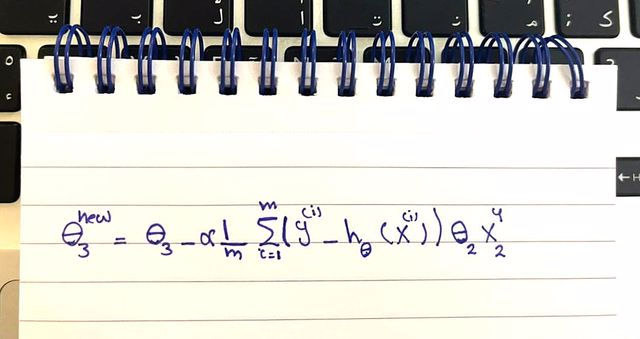

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
## your code must be implmented based on matrices and vectors.
class linear_regression:
    
    def __init__(self,X, y, lrate, epochs):
        self.X=X
        self.y=y
        self.lr = lrate
        self.epochs = epochs
        self.threshold = 0.0001
        
    # Add column of ones to X to represent x0
    def concatenate_X0_with_X(self, X):
        self.X = np.hstack([np.ones([X.shape[0], 1]), X])
        return self.X  

    # 60% training and 40% testing data
    def split_dataset(self, test_percentage=0.4):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_percentage)
        return X_train, X_test, y_train, y_test
    
     # normalize   
    def normalize(self, X):
        self.X = (X - X.mean(axis =0)) / X.std(axis =0)
        return self.X
    
    # y_hat=theta' X
    def predict(self, X, theta):
        return np.dot(X, theta)
    
    # cost function
    def cost_function(self, X_train, y_train, theta):
        m = X_train.shape[0]
        preds = np.dot(X_train, theta)
        err = preds-y_train
        cost = 1/(2*m) * np.dot(err.T, err)
        return cost, err

    # fit
    def fit(self, X_train, y_train,n):
        theta = np.zeros(n)
        cost_history = []
        m = X_train.shape[0]
        i=0
        change=1
        cost=float('inf')
        while i<self.epochs and change>self.threshold:
            cost_prev=cost
            preds = np.dot(X_train, theta)
            cost, err = self.cost_function(X_train, y_train, theta)
            change=np.absolute(cost_prev-cost)
            theta = theta - ((self.lr/m) * np.dot(X_train.T, err))
            cost_history.append(cost)
            change=np.absolute(cost_prev-cost)
            i+=1
        return theta, cost_history

    
    # mean squared error 
    def mean_squared_error(self,y_true, y_pred):
        return np.sum((y_true - y_pred)**2)/y_true.size

## Dataset Used: Weather in Szeged 2006-2016 (multiple input variables)

- Link of Dataset: https://www.kaggle.com/budincsevity/szeged-weather?select=weatherHistory.csv

In [3]:
# Loading Weather in Szeged 2006-2016 the dataset
data ="weatherHistory2.csv"
data_weather = pd.read_csv(data)
y = data_weather['Humidity']
X1 = data_weather.drop('Humidity',axis='columns')
X = X1.drop('Loud Cover',axis='columns')

### Linear Regression Model training using linear regression class

### For learning rate  ∝  0.05

No handles with labels found to put in legend.


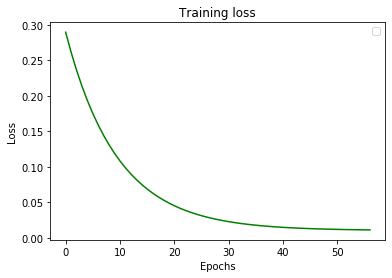

The Mean Squared Error for training data =  0.022427166863421753
The Mean Squared Error for testing data =  0.02231139867096919


In [4]:
# Build the model
iter = 1000
lrate = 0.05
model = linear_regression(X, y,lrate, iter)
#normalize the training features
X = model.normalize(X)
#concatenate 1's X to represent x0
X = model.concatenate_X0_with_X(X)

#split dataset 40% test and 60% train
X_train, X_test, y_train, y_test = model.split_dataset(test_percentage = 0.4)
n = X_train.shape[1]
#train the model
theta, cost_history = model.fit(X_train, y_train,n)

#plot the model loss with epochs
iters = [i for i in range(len(cost_history))]
plt.plot(iters, cost_history, 'g')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_train = model.predict(X_train,theta)
y_pred_test = model.predict(X_test, theta)

# calculate mean_squared_error
print("The Mean Squared Error for training data = ", model.mean_squared_error(y_pred_train, y_train))
print("The Mean Squared Error for testing data = ", model.mean_squared_error(y_pred_test, y_test))

## For learning rate  ∝  0.03

No handles with labels found to put in legend.


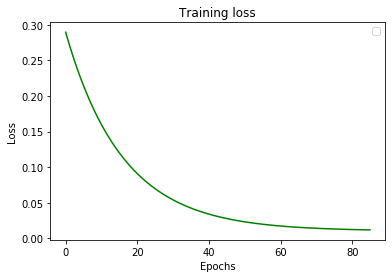

The Mean Squared Error for training data =  0.0237402981608978
The Mean Squared Error for testing data =  0.023635926240672175


In [5]:
# Build the model
iter = 1500
lrate = 0.03
model = linear_regression(X, y, lrate, iter)
#train the model
n= X_train.shape[1]
theta, cost_history = model.fit(X_train, y_train,n)

#plot the model loss with epochs
iters = [i for i in range(len(cost_history))]
plt.plot(iters, cost_history, 'g')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_train = model.predict(X_train,theta)
y_pred_test = model.predict(X_test, theta)

# calculate mean_squared_error
print("The Mean Squared Error for training data = ", model.mean_squared_error(y_pred_train, y_train))
print("The Mean Squared Error for testing data = ", model.mean_squared_error(y_pred_test, y_test))

## For learning rate  ∝  0.01

No handles with labels found to put in legend.


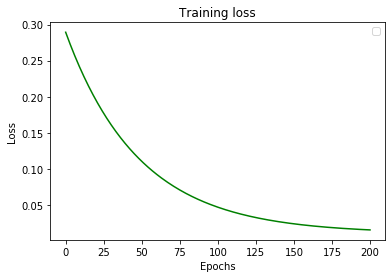

The Mean Squared Error for training data =  0.030404285070190797
The Mean Squared Error for testing data =  0.030333894218987405


In [6]:
# Build the model
iter = 1500
lrate = 0.01
model = linear_regression(X, y, lrate, iter)

n= X_train.shape[1]
theta, cost_history = model.fit(X_train, y_train,n)

#plot the model loss with epochs
iters = [i for i in range(len(cost_history))]
plt.plot(iters, cost_history, 'g')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred_train = model.predict(X_train,theta)
y_pred_test = model.predict(X_test, theta)

# calculate mean_squared_error
print("The Mean Squared Error for training data = ", model.mean_squared_error(y_pred_train, y_train))
print("The Mean Squared Error for testing data = ", model.mean_squared_error(y_pred_test, y_test))

## Question 3 (only one input variable )

- Using the same dataset as above but using only one feature named Apparent Temperature (C) to predict Humidity

### Sklearn Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data_weather = pd.read_csv(data)
y = data_weather['Humidity']
X_modified = data_weather['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X_modified,y, test_size=0.3)
MSE_list = []

linear_model = LinearRegression()

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

linear_model.fit(X_train, y_train)
y_train_predict = linear_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)

y_test_predict = linear_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)

MSE_list.append(mse_test)
print("MSE on training data:",mse_train)
print("MSE on testing data:",mse_test)

MSE on training data: 0.024358381753528172
MSE on testing data: 0.024283043517647953


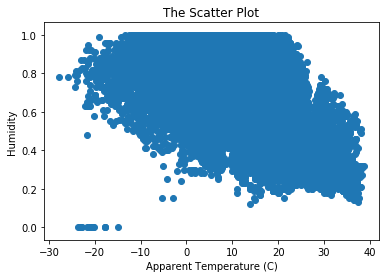

In [8]:
#scatter plot for visualizing the training data
plt.scatter(X_train, y_train, marker='o')
plt.title("The Scatter Plot")
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')
plt.show()

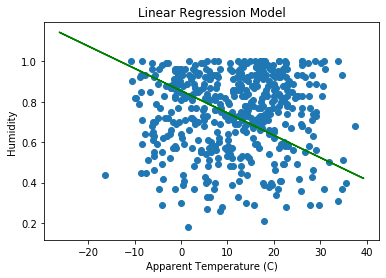

In [9]:
#scatter plot of testing data along with the best fit line
plt.scatter(X_test[1-500:], y_test[1:500])
plt.title("Linear Regression Model")
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')
plt.plot(X_test, y_test_predict, color='Green')
plt.show()

## Sklearn Lasso Regression

In [10]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.3)


lasso_model.fit(X_train, y_train)
y_train_predict = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)

y_test_predict = lasso_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)

MSE_list.append(mse_test)

print("MSE on training data:",mse_train)
print("MSE on testing data:",mse_test)

MSE on training data: 0.025143003783895338
MSE on testing data: 0.02503942107853608


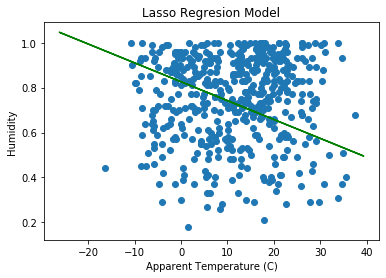

In [11]:
#scatter plot of testing data along with the best fit line
plt.scatter(X_test[1-500:], y_test[1:500])
plt.title("Lasso Regresion Model")
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')
plt.plot(X_test, y_test_predict, color='Green')
plt.show()

## Sklearn Ridge Regression

In [12]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha=15)

ridge_model.fit(X_train, y_train)
y_train_predict = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)

y_test_predict = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)

MSE_list.append(mse_test)

print("MSE on training data:",mse_train)
print("MSE on testing data:",mse_test)

MSE on training data: 0.02435838175358045
MSE on testing data: 0.02428304333985021


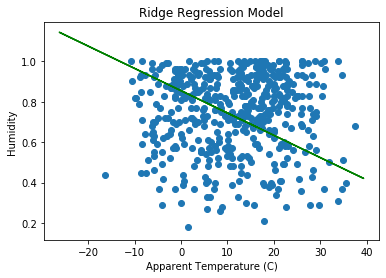

In [13]:
#scatter plot of testing data along with the best fit line
plt.scatter(X_test[1-500:], y_test[1:500])
plt.title("Ridge Regression Model")
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')
plt.plot(X_test, y_test_predict, color='Green')
plt.show()

## Sklearn Polynomial linear regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
# PolynomialFeatures 

data_weather = pd.read_csv(data)
y = data_weather['Humidity']
X_modified = data_weather['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X_modified,y, test_size=0.3)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


model = LinearRegression()
model.fit(X_poly_train, y_train)
y_train_predict = model.predict(X_poly_train)

mse_train = mean_squared_error(y_train, y_train_predict)

y_test_predict = model.predict(X_poly_test)
mse_test = mean_squared_error(y_test, y_test_predict)

MSE_list.append(mse_test)

print("MSE on training data:",mse_train)
print("MSE on testing data:",mse_test)

MSE on training data: 0.020984027402858197
MSE on testing data: 0.020823221699101932


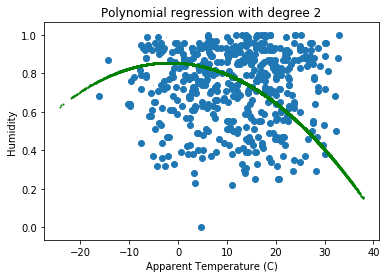

[0.024283043517647953, 0.02503942107853608, 0.02428304333985021, 0.020823221699101932]


In [15]:
plt.scatter(X_test[1-500:], y_test[1:500])
plt.title("Polynomial regression model")
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')
plt.scatter(X_test,y_test_predict,color="Green", s = 1)
plt.title("Polynomial regression with degree "+str(degree))
plt.show()
print(MSE_list)

## Bar chart for comparison of the mean squared error on testing data


[0.024283043517647953, 0.02503942107853608, 0.02428304333985021, 0.020823221699101932]


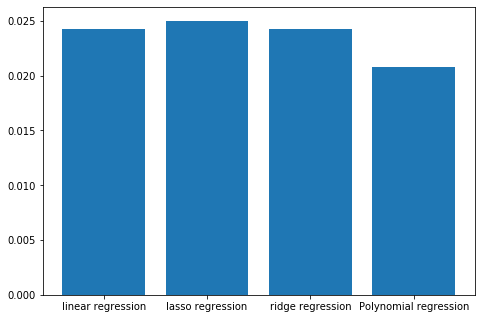

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['linear regression', 'lasso regression', 'ridge regression', 'Polynomial regression']
ax.bar(models,MSE_list)
print(MSE_list)
plt.autoscale(enable=True, axis='y')
plt.show()

##  Question 4
### Normal equation (using dataset in Q2) 

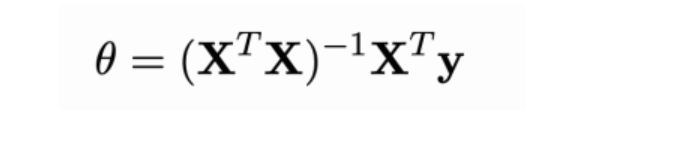

In [17]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [18]:
data_weather = pd.read_csv(data)
y = data_weather['Humidity']
X1 = data_weather.drop('Humidity',axis='columns')
X = X1.drop('Loud Cover',axis='columns')

theta = normal_equation(X, y)
theta

array([-0.01375418,  0.00234205, -0.0029374 ,  0.00025505, -0.00154706,
        0.00085905])